## CUSTOMER CHURN DATA ANALYSIS:
#### We are goin to use this dataset for; 
#### - customer behaviour analysis, - feature understanding and impact, 
#### - predictive modeling, - model evaluation on unseen data, - business decision insights


##### Phase 1: Exploratory Data Analaysis:
###### What to check in dataset?
1) number of records
2) number of features
3) data types (numerical vs categorical)
4) presence of missing value


In [60]:
# import libraries
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns 

plt.style.use("default")
sns.set_context("notebook")


In [62]:
# load the data set
df = pd.read_csv("C:\\Users\\tehre\\Downloads\\customer_churn_dataset-testing-master.csv\\customer_data.csv")

In [64]:
df.head()
df.info()
df.describe()

df['Churn'].value_counts(normalize=True) * 100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


Churn
0    52.631497
1    47.368503
Name: proportion, dtype: float64

In [9]:
# what we need to do is drop customer id columns because in this EDA it is irrelevant and unnecessary. 
df_eda = df.drop(columns=['CustomerID'])

df_eda.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [11]:
# assign relavent columns to numerical columns
numerical_cols = [
    'Age', 
    'Tenure', 
    'Usage Frequency', 
    'Support Calls', 
    'Payment Delay',  
    'Total Spend', 
    'Last Interaction', 
]


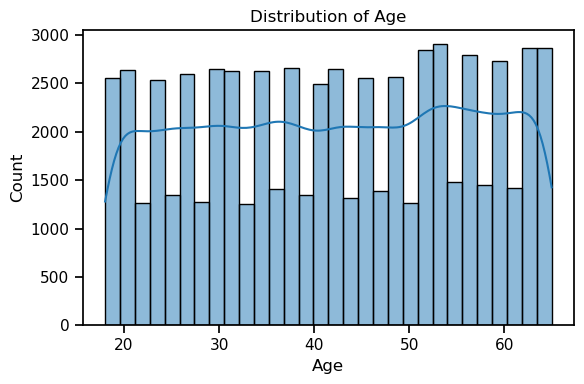

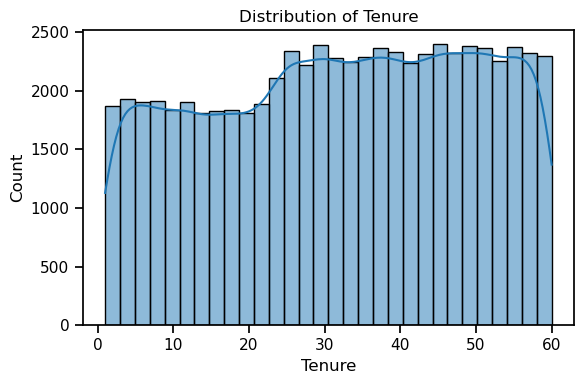

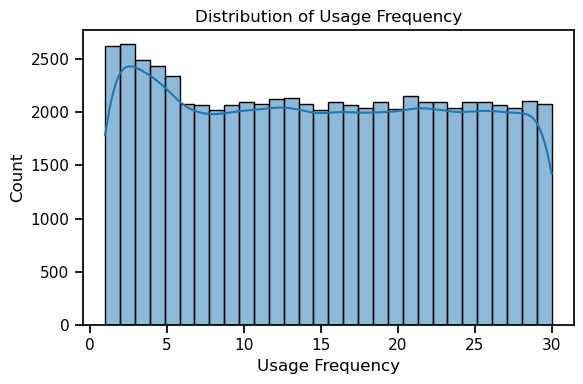

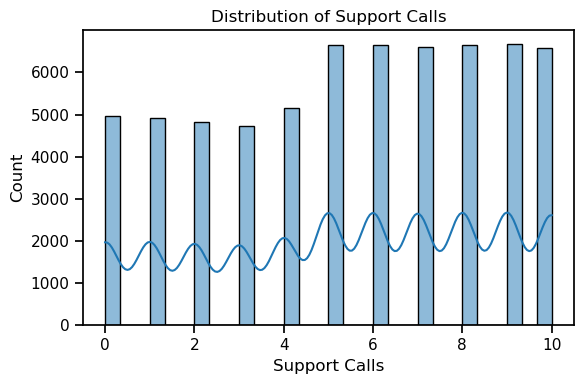

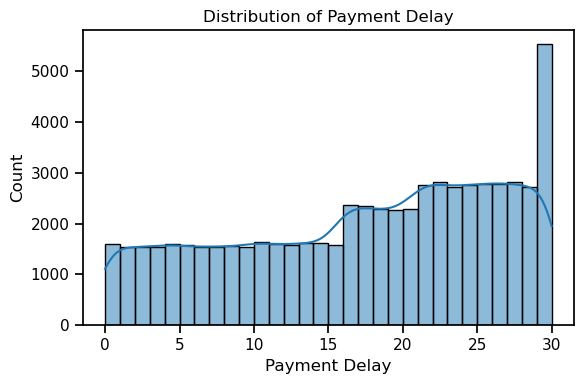

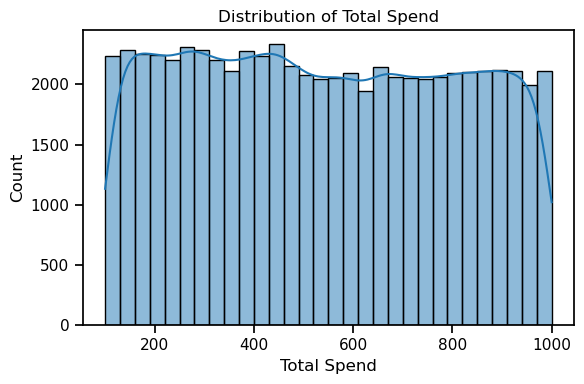

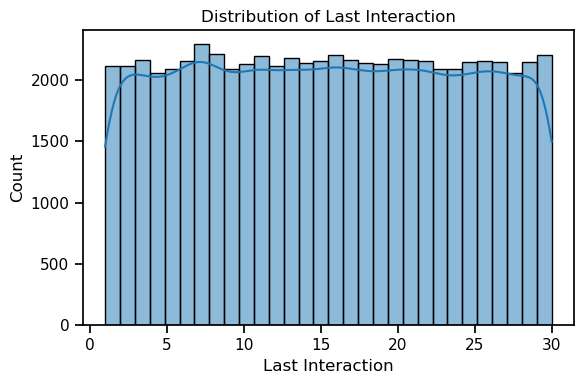

In [26]:
# use histograms to understand spread and skew
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins = 30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

In [28]:
# lets look at summary of these graghs 
df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,64374.0,41.970982,13.924911,18.0,30.0,42.0,54.0,65.0
Tenure,64374.0,31.994827,17.098234,1.0,18.0,33.0,47.0,60.0
Usage Frequency,64374.0,15.080234,8.816470,1.0,7.0,15.0,23.0,30.0
Support Calls,64374.0,5.400690,3.114005,0.0,3.0,6.0,8.0,10.0
Payment Delay,64374.0,17.133952,8.852211,0.0,10.0,19.0,25.0,30.0
Total Spend,64374.0,541.023379,260.874809,100.0,313.0,534.0,768.0,1000.0
Last Interaction,64374.0,15.498850,8.638436,1.0,8.0,15.0,23.0,30.0


##### Key Observations from Numerical Feature Summary

1) The customer base is evenly distributed across age groups, suggesting age may not be a dominant churn driver.

2) Tenure shows wide variability, indicating its potential importance in distinguishing churned and retained customers.

3) Usage frequency and last interaction values suggest varying levels of customer engagement.

4) Support calls and payment delays highlight potential dissatisfaction or risk behaviors.

5) Total spend varies significantly, emphasizing the importance of identifying churn among high-value customers.

In [31]:
# we will now add value to our statement in respect of business understanding 
# by comparing churn values with retained customers.
df.groupby("Churn")[numerical_cols].mean().T

Churn,0,1
Age,41.132700,42.902404
Tenure,28.826481,35.515200
Usage Frequency,16.042915,14.010593
Support Calls,4.500753,6.400617
Payment Delay,12.453086,22.334897
Total Spend,560.541956,519.336143
Last Interaction,15.521944,15.473191


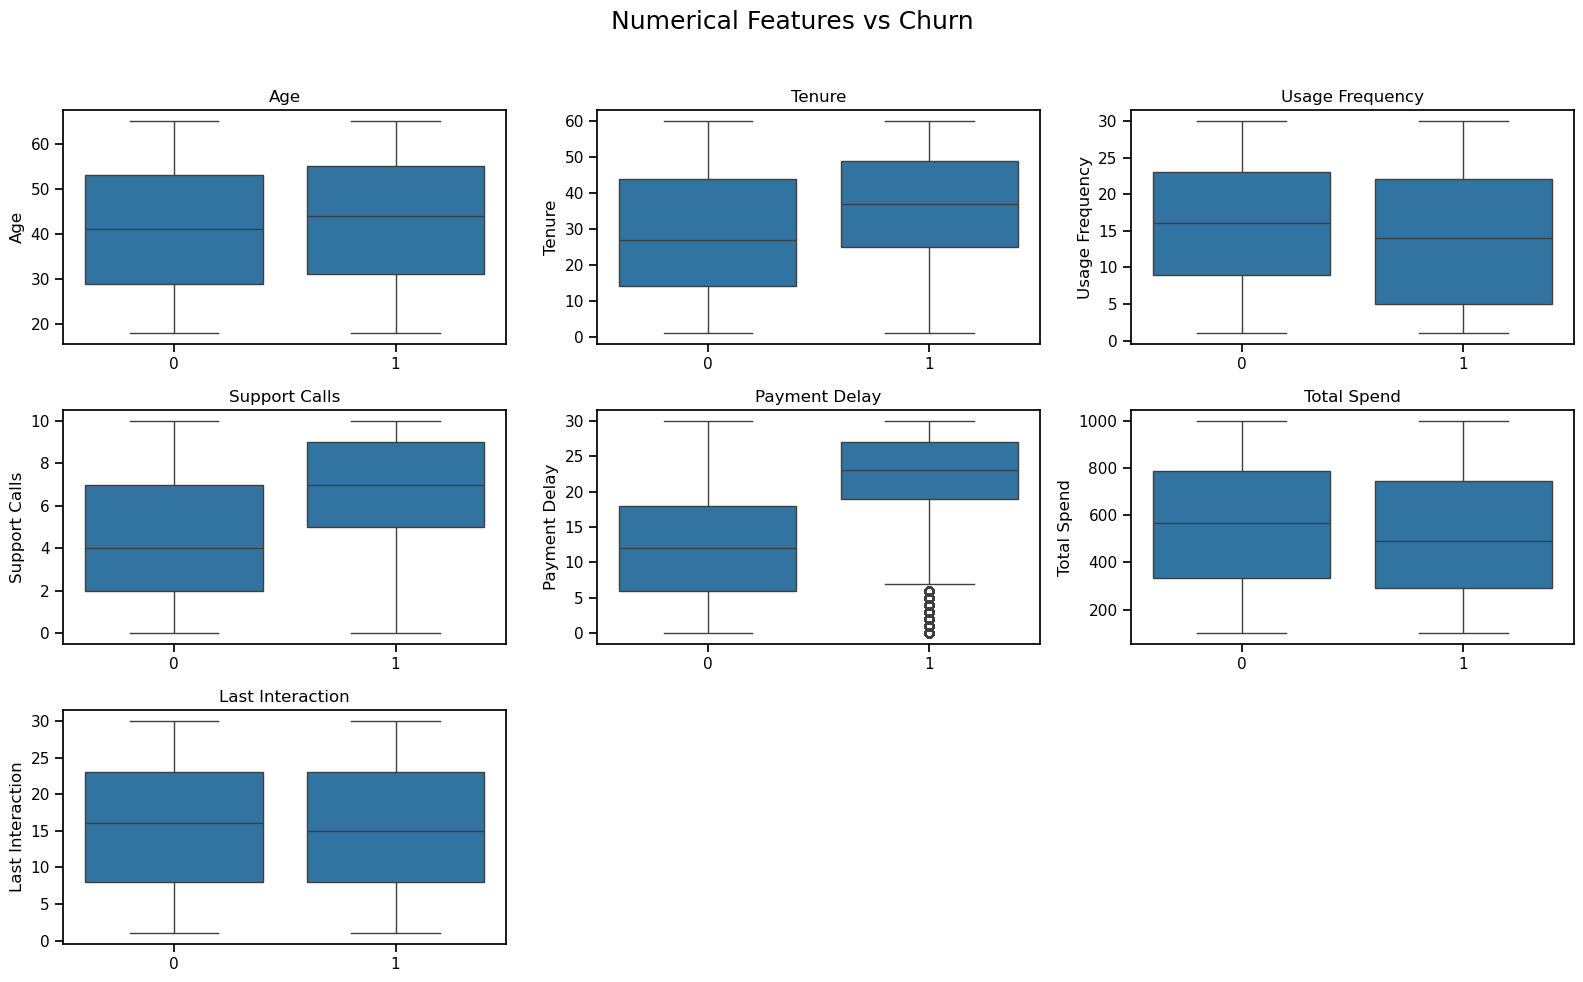

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(16, 10))

numerical_cols = [
    "Age",
    "Tenure",
    "Usage Frequency",
    "Support Calls",
    "Payment Delay",
    "Total Spend",
    "Last Interaction"
]
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(col)
    plt.xlabel("")


plt.suptitle("Numerical Features vs Churn", fontsize=18)
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

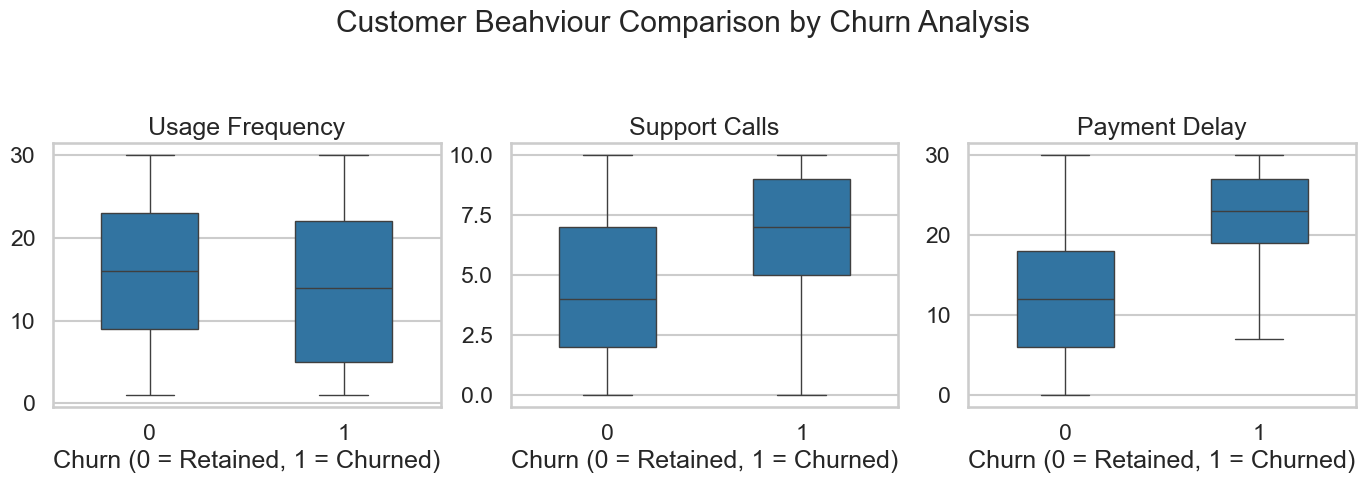

In [23]:
# Boxplot for key_features
sns.set_style("whitegrid")
sns.set_context("talk")

key_features = [
    "Usage Frequency", 
    "Support Calls",
    "Payment Delay"
]

plt.figure(figsize=(14, 5))

for i, col in enumerate(key_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(
        x="Churn",
        y=col,
        data=df, 
        width=0.5,
        showfliers=False
    )
    plt.title(col)
    plt.xlabel("Churn (0 = Retained, 1 = Churned)")
    plt.ylabel("")

plt.suptitle("Customer Beahviour Comparison by Churn Analysis")
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


In [25]:
#summary statistics:
summary_stats = (
    df.groupby("Churn")[key_features].agg(["median", "quantile"])
)

summary_stats

Usage Frequency          Support Calls          Payment Delay         
               median quantile        median quantile        median quantile
Churn                                                                       
0                16.0     16.0           4.0      4.0          12.0     12.0
1                14.0     14.0           7.0      7.0          23.0     23.0

In [49]:
def iqr(x):
    return x.quantile(0.75) - x.quantile(0.25)

summary_stats  = (
    df.groupby("Churn")[key_features].agg("median", iqr))
summary_stats 


,Usage Frequency,Support Calls,Payment Delay
Churn,,,
0,16.0,4.0,12.0
1,14.0,7.0,23.0


#### Numerical Behaviour - Insight
##### Boxplots were used to compare churned and retained customers, as they effectively capture median behaviour and variability. Clear separation is observed in support calls and payment delays, indicating strong behavioural differences between the two groups.

#### Categorical Churn Behaviour Analysis
1) contract length
2) subscription Type
3) gender

In [54]:
# defin categorical columns
categorical_cols = [
    "Contract Length",
    "Subscription Type", 
    "Gender"
]

In [56]:
# calculate churn rate
churn_rate_cat = (
    df.groupby(categorical_cols)["Churn"].mean().reset_index()
)

churn_rate_cat

,Contract Length,Subscription Type,Gender,Churn
0,Annual,Basic,Female,0.534361
1,Annual,Basic,Male,0.403824
2,Annual,Premium,Female,0.509367
3,Annual,Premium,Male,0.398880
4,Annual,Standard,Female,0.511452
5,Annual,Standard,Male,0.402474
6,Monthly,Basic,Female,0.620664
7,Monthly,Basic,Male,0.398730
8,Monthly,Premium,Female,0.620580
9,Monthly,Premium,Male,0.370012


C:\Users\tehre\AppData\Local\Temp\ipykernel_22256\1344275635.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\tehre\AppData\Local\Temp\ipykernel_22256\1344275635.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\tehre\AppData\Local\Temp\ipykernel_22256\1344275635.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


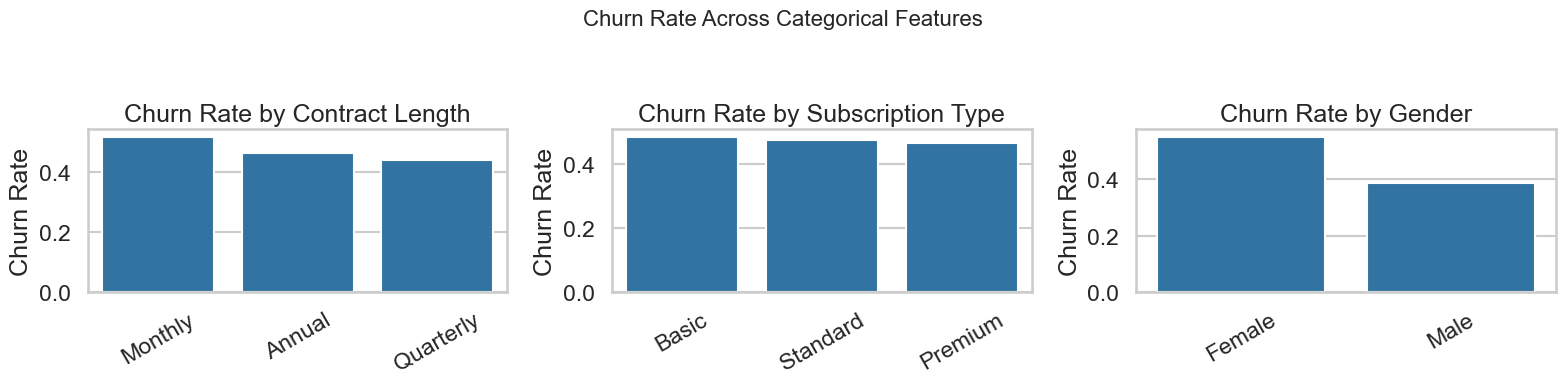

In [72]:
# bar chart for visual representation 
sns.set_style("whitegrid")
sns.set_context("talk")

plt.figure(figsize=(16,4))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    sns.barplot(
        x = col, 
        y = "Churn", 
        data = df,
        ci = None
    )
    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Churn Rate")
    plt.xlabel("")
    plt.xticks(rotation=30)

plt.suptitle("Churn Rate Across Categorical Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


#### Understanding the conclusion 
##### Churn rates across categorical features were analyzed using bar plots. Since churn is encoded as a binary variable, the mean churn value represents the churn rate for each category.